In [14]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [15]:
# 1. Chargez votre jeu de données
data = pd.read_csv('CC GENERAL.csv')
data = data.drop('CUST_ID', axis = 1) 
data.fillna(method ='ffill', inplace = True) 
data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


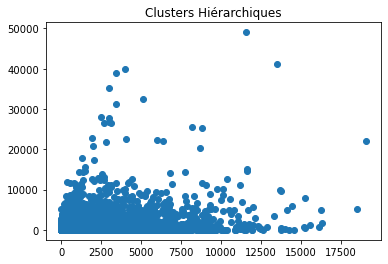

In [9]:
# 2. Utilisez le clustering hiérarchique pour identifier les regroupements inhérents à vos données[^2^][2].
Z = linkage(data, 'ward')

# 3. Tracez les clusters.
plt.figure()
plt.scatter(data['BALANCE'], data['PURCHASES'])
plt.title('Clusters Hiérarchiques')
plt.show()

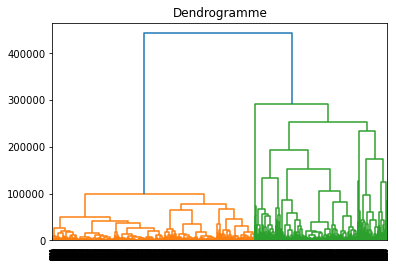

In [10]:
# 4. Tracez le dendrogramme
plt.figure()
dendrogram(Z)
plt.title('Dendrogramme')
plt.show()

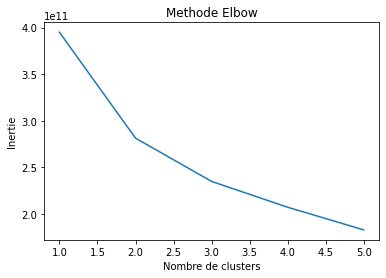

In [20]:
# 5. Utilisez le clustering K-means
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# 6. Essayez différentes valeurs K et sélectionnez la meilleure
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 6), inertia)
plt.title('Methode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

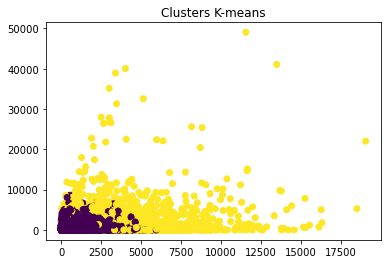

In [24]:
# 7. Tracez les clusters
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_

plt.figure()
plt.scatter(data['BALANCE'], data['PURCHASES'], c=labels)
plt.title('Clusters K-means')
plt.show()